![RFCAN](logo.png "RFCAN_LOGO")

In [ ]:
from codes_RF.prep import PREP

box = [55, 85, -105, -75]
radius =[30, 100]
mag = [5.5, 10.0]
events = [2000, 2030]
year = 3 #years of data

In [ ]:
PREP.preparation(box, radius, mag, events, year, verbose=False)

### Downloading RAW_WFs

To minimize the time spent on downloading from NRCAN, you have the option to specify which networks you want to download from their web server. Simply set nrcan=True to activate downloading from this source.
```
DL.comprehensive_download(NET1, NET2, ..., nrcan=True)
```



In [ ]:
from codes_RF.prep import DL
DL.comprehensive_download("X5","PO", nrcan=True)

### Creating RFs

In [ ]:
from codes_RF.prep import RF
list = RF.mk_rf(filters=[0.05,0.5])

### Manual QC

you can analyze your data set by filtering some part and look at the results

In [ ]:
from codes_RF.prep import QC
QC.preview(filters=["sta_code-eq-TQF","rf_quality-eq-1"], data_type="rf", preview_type="plot")

here you can do QC by examining the RFs and the corresponding RAW_WFs one-on-one

In [ ]:
from codes_RF.prep import QC
QC.manual_quality()

### Automatic QC by DeepQCRF

Doing QC using DeepQCRF is also possible, and you just need to use the following command and also filter your dataset by test_set_keywords:


In [ ]:
from codes_RF.prep import QC

test_set_keywords = ["net_code-eq-X5", "ev_mag-gt-5.0"]
new_df = QC.quality_pred(test_set_keywords)

### Visualizing RFs

Setting your input stations and the bin size for the RFs

In [ ]:
from codes_RF.viz import viz

sta_list = ['DORN', 'MANN', 'MARN', 'NOTN', 'SHMN', 'SHWN', 'CRLN', 'CTSN']
hist_bin = 18

In [ ]:
my_proj = viz(sta_list, hist_bin, using_pred=True)   #create a viz object
my_proj.distribution_hist()         #plot distribution histogram for baz and slow
my_proj.plot_section(type="slow")   #plot section for slow
my_proj.plot_section(type="baz")    #plot section for baz

## H-k Stacking

! below station ILON is in both CN and PO networks, so it uses both networks to stack the 

I removed station **AKVQ** from the list cause there is only two waveforms for this station

In [ ]:
from codes_RF.hk import HKCan

path_file = "DATA/waveforms_list.csv"
# stations = ["SHWN", "SHMN", "MARN", "MANN", "DORN", "NOTN", "CRLN", "CTSN"]
# # counter =  0      1        2       3       4       5       6       7       8      9       10      11      12      13    14      15      16     17      18     19      20       21
stations = ["SHWN", "SHMN", "MARN", "MANN", "DORN", "NOTN", "CRLN", "CTSN", "AXF", "CNF", "IBFB", "IBFE", "TQF", "BLKN", "EUNU", "FCC", "ILON", "POIN", "RES", "SAKN", "AP3N", "ARVN", "BULN", "GIFN", "IGLN", "INUQ", "IVKQ", "JSON", "KUGN", "LAIN", "MCMN", "MRYN", "NUNN", "QILN", "SEDN", "SMLN", "SNKN", "SNQN", "SRLN", "STLN", "WAGN", "YBKN", "YRTN"]
stations = ["EUNU"] 
weights = [[0,1,-9]]
# counter =  0      1        2           3       4         5          6          7        8           9       10           11      12           13         14         15          16        17      18     19    20          21
# weights = [[1,1,0], [1,2,0], [1,12,0], [1,2,0], [1,5,1], [1,3,1], [9,1,0.1], [3,1,0], [5, 1, 0], [1, 3, 1], [4, 1, 0], [1, 1, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1] ]  #prediction
# weights = [[2,3,0], [1,4,0], [1,12,0], [2,4,0], [1,5,1], [1,4,1], [5,1,0], [10,5,1]]  #real

for sta in stations:
    hkcan = HKCan(path_file, sta, weights=weights[stations.index(sta)])
    hkcan.hk(vp=6.5)
    # hkcan.hk_change_param(weights=weights[stations.index(sta)], plot=True, auto_optimization=True)
    

['SNQN' 'SRLN' 'STLN' 'WAGN' 'YBKN' 'YRTN' 'CRLN' 'CTSN' 'DORN' 'MANN'
 'MARN' 'NOTN' 'SHMN' 'SHWN' 'MRYN']
==================== SNQN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 0.0
Number of events = 20


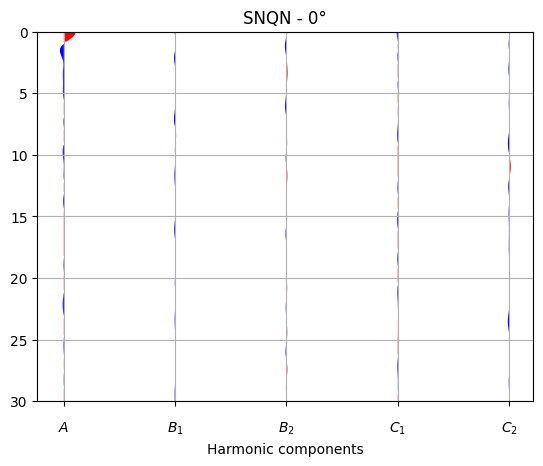

==================== SRLN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 28.0
Number of events = 57


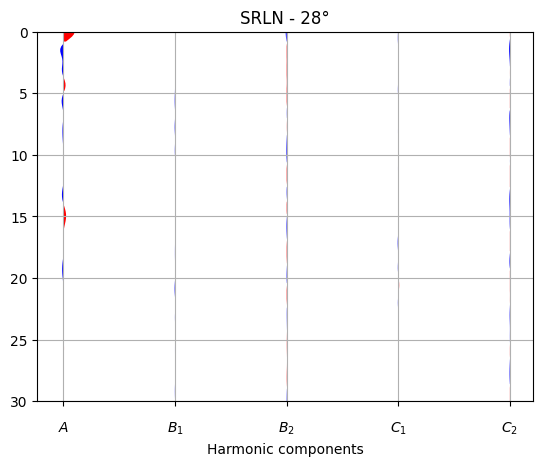

==================== STLN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 32.0
Number of events = 23


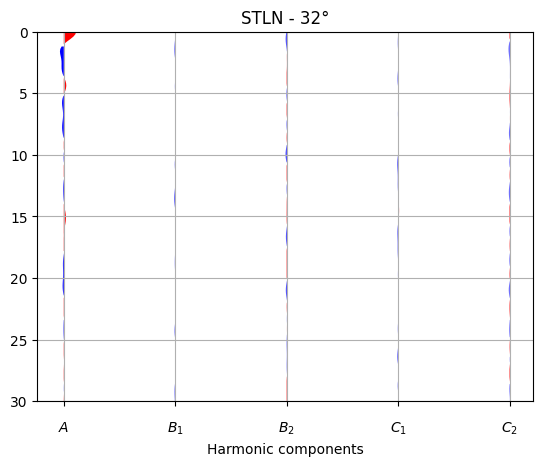

==================== WAGN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 130.0
Number of events = 15


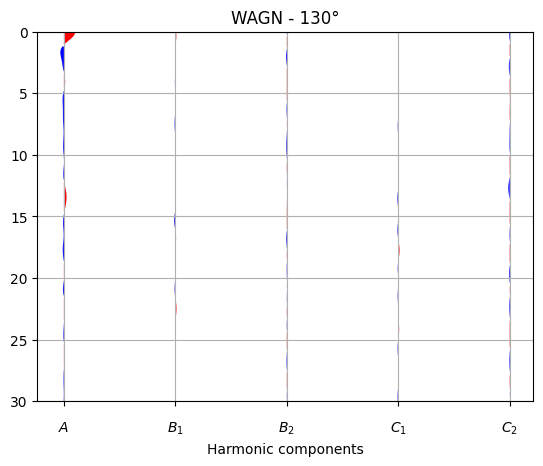

==================== YBKN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 12.0
Number of events = 31


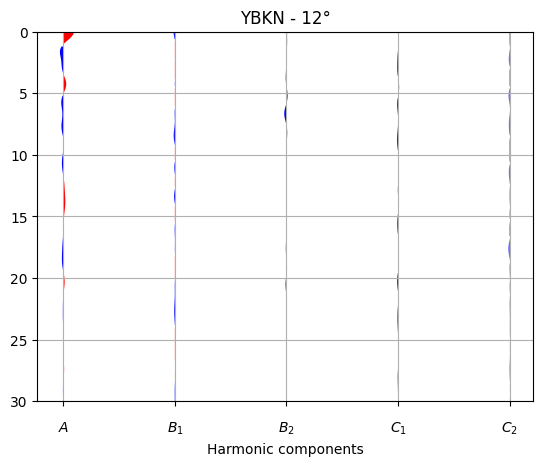

==================== YRTN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 30.0
Number of events = 14


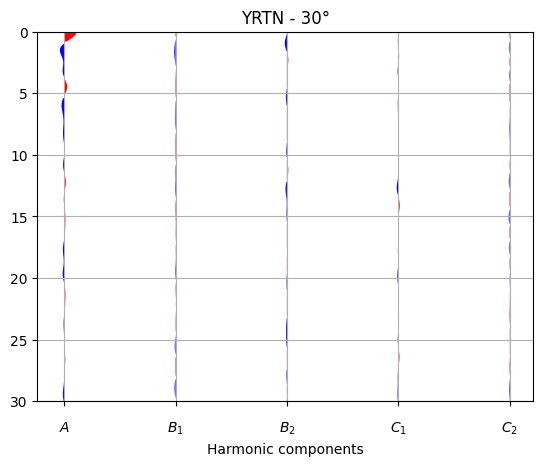

==================== CRLN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 120.0
Number of events = 43


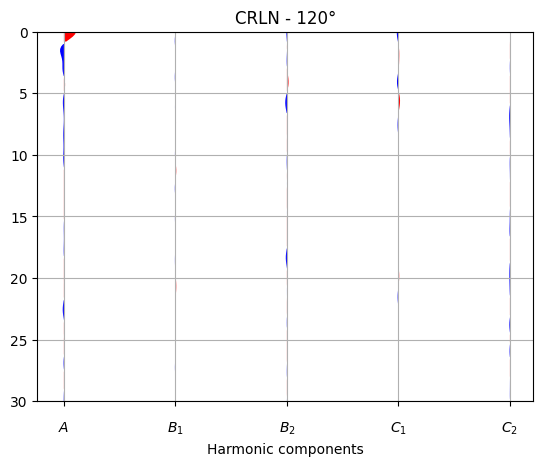

==================== CTSN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 30.0
Number of events = 50


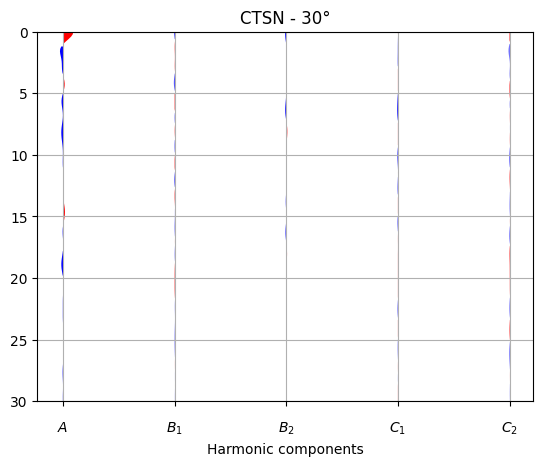

==================== DORN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 108.0
Number of events = 83


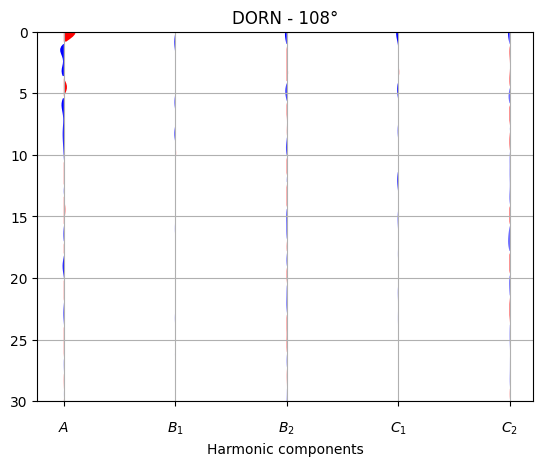

==================== MANN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 142.0
Number of events = 43


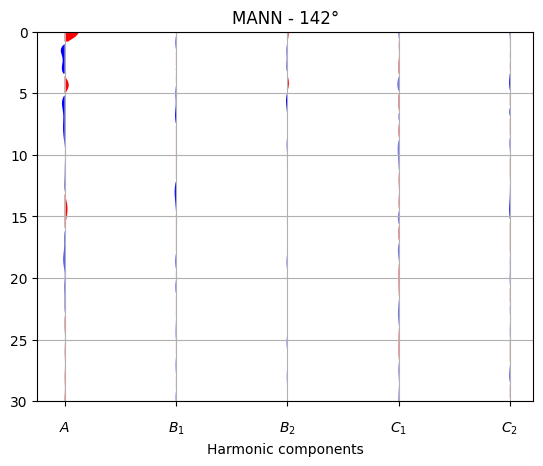

==================== MARN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 278.0
Number of events = 49


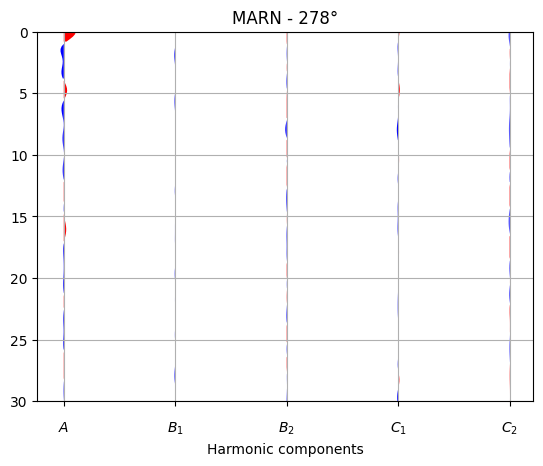

==================== NOTN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 90.0
Number of events = 47


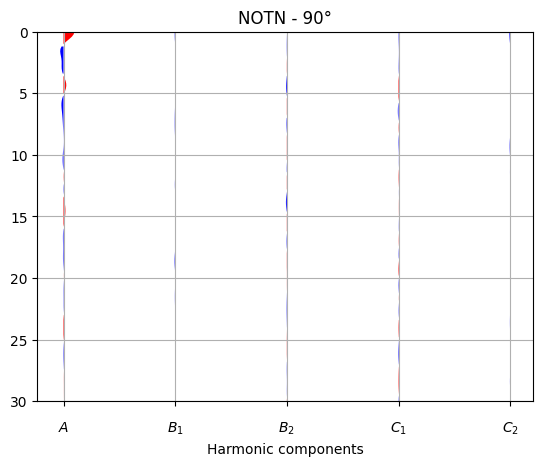

==================== SHMN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 56.0
Number of events = 42


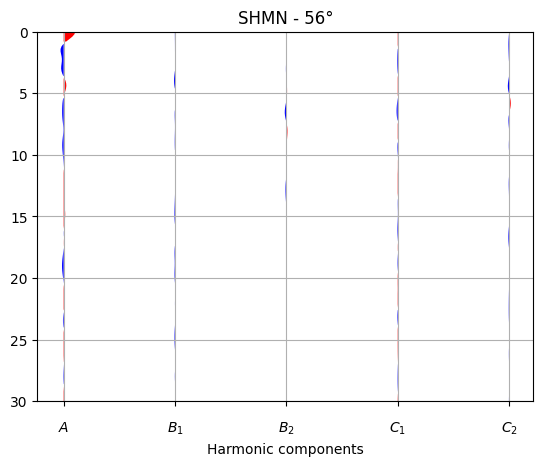

==================== SHWN ====================

Decomposing receiver functions into baz harmonics
harmonics.azim = 296.0
Number of events = 40


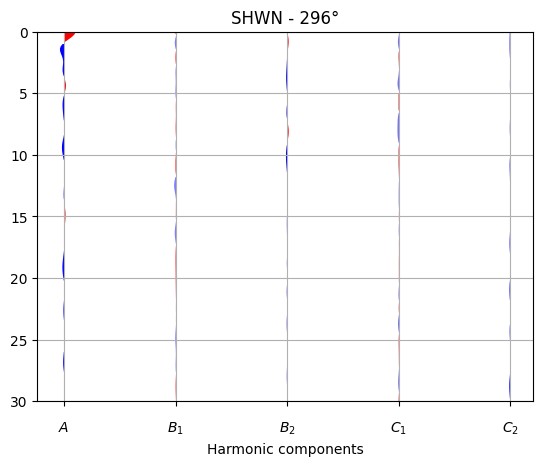

==================== MRYN ====================


TypeError: __init__() missing 1 required positional argument: 'transvRF'

In [16]:
from codes_RF.rfpy_pkg.harmonics import Harmonics
import pandas as pd
import obspy


# stations = ["SHWN", "SHMN", "MARN", "MANN", "DORN", "NOTN", "CRLN", "CTSN"]
# stations = ["SHWN", "SHMN", "MARN", "MANN", "DORN", "NOTN", "CRLN", "CTSN", "AXF", "CNF", "IBFB", "IBFE", "TQF", "MISB1", "MISB2", "PVB1", "PVB2", "BLKN", "EUNU", "FCC", "ILON", "POIN", "RES", "SAKN", "AKVQ", "AP3N", "ARVN", "BULN", "GIFN", "IGLN", "INUQ", "IVKQ", "JSON", "KUGN", "LAIN", "MCMN", "MRYN", "NUNN", "QILN", "SEDN", "SMLN", "SNKN", "SNQN", "SRLN", "STLN", "WAGN", "YBKN", "YRTN"]
stations = pd.read_csv("DATA/waveforms_list.csv")["sta_code"].unique()

#temp#temp#temp
import numpy as np
stations = np.delete(stations, np.where(stations == "AKVQ"))
stations = np.delete(stations, np.where(stations == "SNKN"))
stations = np.delete(stations, np.where(stations == "KJKQ"))
stations = np.delete(stations, np.where(stations == "MYRN"))

for sta in stations:

    print(f"==================== {sta} ====================")
    list_df = pd.read_csv("DATA/waveforms_list.csv")
    list_sta = list_df[(list_df.sta_code == sta) & (list_df.rf_quality == 1)]

    #reading all waveforms R and T
    rfR = obspy.Stream()
    rfT = obspy.Stream()

    for i in range(len(list_sta)):
        file_name = list_sta.file_name.iloc[i]
        path = f"DATA/RF/{file_name}.pkl"
        wf = obspy.read(path)
        rfR += wf.select(channel = "RFR")
        rfT += wf.select(channel = "RFT")

    rfR.filter('bandpass', freqmin = 0.05, freqmax = 0.5, corners = 2, zerophase = True)
    rfT.filter('bandpass', freqmin = 0.05, freqmax = 0.5, corners = 2, zerophase = True)

    harmonics = Harmonics(rfR, rfT)


    harmonics.dcomp_find_azim()

    print(f"{harmonics.azim = }")
    print(f"Number of events = {len(list_sta)}")

    harmonics.plot(scale = 1.5, title=f"{sta} - {harmonics.azim:.0f}°")

In [ ]:
harmonics.forward(baz_list=[10, 20, 30, 348])

In [ ]:
import matplotlib.pyplot as plt
for tr in harmonics.radial_forward:
    tr.plot()
    plt.show()

In [8]:
#remove an item from an numpy array

stations

array(['AXF', 'CNF', 'IBFB', 'IBFE', 'MCF', 'TQF', 'BLKN', 'FCC', 'ILON',
       'POIN', 'RES', 'SAKN', 'AKVQ', 'AP3N', 'ARVN', 'BULN', 'GIFN',
       'IGLN', 'INUQ', 'JOSN', 'KJKQ', 'KUGN', 'LAIN', 'MCMN', 'NUNN',
       'QILN', 'SEDN', 'SMLN', 'SNKN', 'SNQN', 'SRLN', 'STLN', 'WAGN',
       'YBKN', 'YRTN', 'CRLN', 'CTSN', 'DORN', 'MANN', 'MARN', 'NOTN',
       'SHMN', 'SHWN', 'MRYN'], dtype=object)